# Titanic Data Science Solutions

In [1]:
# 분석에 사용되는 라이브러리
import pandas as pd
import numpy as np
import random as rnd

# 시각화 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 머신러닝
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### 데이터 가져오기

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

- 어떤 변수가 사용가능한 데이터일까?

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


- PassengerId : 승객 번호
- Survived : 생존여부(1: 생존, 0 : 사망)
- Pclass : 승선권 클래스(1 : 1st, 2 : 2nd ,3 : 3rd)
- Name : 승객 이름
- Sex : 승객 성별
- Age : 승객 나이 
- SibSp : 동반한 형제자매, 배우자 수
- Patch : 동반한 부모, 자식 수
- Ticket : 티켓의 고유 넘버
- Fare 티켓의 요금
- Cabin : 객실 번호
- Embarked : 승선한 항구명(C : Cherbourg, Q : Queenstown, S : Southampton)

#### 범주형 데이터
    - 명목형(Categorical) :Survived, Sex, Embarked
    - 순서형(Ordinal) : Pclass
#### 수치형 데이터 
    - 연속형(Continuous) : Age, Fare
    - 이산형(Discrete) : SibSp, Parch

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

#### 결측치
- 트레인셋
    - Cabin > Age > Embarked 순서로 많은 결측치를 가짐
- 테스트셋
    - Cabin > Age 순서로 많은 결측치를 가짐

#### 데이터 확인
     트레인셋에는 7개의 변수가 integer or float 타입이다.(테스트셋은 6개)
     5개의 변수가 object 타입이다.

In [7]:
train_df.describe()
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 데이터 세트의 데이터 확인
- 이것을 통해서 실제 문제에서 훈련데이터의 대표성을 판별하는 역할을 함
    - 전체 샘플은 891명으로 실제 탑승객(2224명)에 40%에 해당된다.
    - Survived 는 0과 1을 값으로 갖는 범주형 데이터이다.
    - 대부분의 승객(75%)은 동행하지않고 혼자 탑승했다.
    - 약 30 %의 승객이 형제 자매 및 / 또는 배우자가 탑승했다.

In [8]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Pain, Dr. Alfred",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


#### 상관관계 
- Survival에대해 각각의 변수들과의 관계를 알고싶습니다.

#### 결측치 채우기
- Age변수는 확실히 생존과 관련이 있기때문에 결측치를 채워야합니다.
- Embarked 역시 다른 변수들과 관련 있을 수 있기 때문에 결측치를 채우는게 좋습니다.

#### 그 밖에
1. Ticket 변수는 중복률이 22% 이고, 생존률과 관련이 없기 때문에 제외될 수 있습니다.
2. Cabin 변수는 불안전하고, 결측치가 너무 많으므로 제외해야 합니다.
3. PassengerId는 생존과 무관하므로 삭제할 수 있습니다.
4. Name변수 역시 분석내용과 무관할 수 있읍니다.

#### 생성
1. Parch와 SibSp변수를 Family라는 새로운 변수로 만들어 
    총 가족 구성원 수를 확보 할 수 있습니다.
2. Name변수를 변형하여 Title이라는 새로운 변수를 만들 수 있습니다.
3. Age변수를 범주형 데이터로 바꿔야 합니다.
4. Fare변수는 범주형으로 변환하여 우리의 분석에 도움줄 수 있습니다.

## 가설
1. 여성의 생존률이 더 높다.
2. 어린 아이들의 생존률이 더 높다.
3. 상류층고객(Pclass=1)의 생존률이 더 높다.


## 변수들 피벗하기

- 변수들을 서로 피벗하여 변수들의 상관관계를 빠르게 분석할 수 있습니다.
    대신 변수들의 결측치가 없어야 가능하며 범주형 (Sex), 서수형 (Pclass) 그리고 이산형 (SibSp, Parch) 타입의 데이터만 가능합니다.
    - Pclass 변수는 3분류로 나눠서 분석할 예정입니다.
    - Sex 변수는 여성이 74%로 생존률이 높은 것으로 알게되었습니다., 1분류
    - SibSp과 Parch변수는 특정 상관관계가 없습니다. 새로운 변수로 통합할것 입니다.

#### 피벗이란?
- 1차 연립 방정식에서의 주축 방정식을 가려내는 기법을 통틀어 피버팅이라 하며, 행렬에서 소거법을 수행할 때, 행 연산 규칙을 적용하여 계수 행렬 원소 가운데 절댓값이 가장 큰 원소가 대각선상에 오도록 해서 이 원소를 피벗 원소로 택하는 방법. 피버팅은 전체 피버팅과 부분 피버팅이 있는데, 이 중 전체 피버팅은 전체의 원소 중에서 피벗 원소를 찾는 데 반하여, 부분 피버팅은 제1열부터 차례로 소거해 나가되 한 개의 열 내에서만 가장 큰 원소를 찾아서 이것을 대각선상에 오도록 행을 교환하여 피벗 원소로 취한다.

In [9]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [10]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [11]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [12]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## 시각화를 통한 분석

- 히스토그램 차트는 밴딩 또는 범위가 유용한 패턴을 식별하는 데 도움이되는 연령과 같은 연속적인 숫자 변수를 분석하는 데 유용합니다. 
- 히스토그램은 자동으로 정의 된 빈 또는 동일 범위 대역을 사용하여 샘플 분포를 나타낼 수 있습니다. 

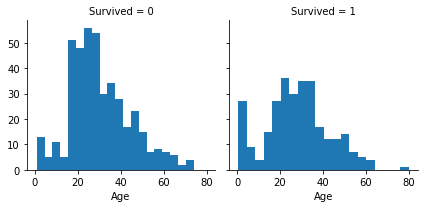

In [13]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

- 4살 아래의 유아의 생존률이 매우 높습니다.
- 15~25세의 많은 사람들이 생존하지 못했습니다.
- 승객의 대부분은 15~35세가 가장 많습니다.

### 결과
- Age변수를 분류 해야합니다.
- 결측치에 대해 채우는 작업이 필요합니다.


C:\Users\82105\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


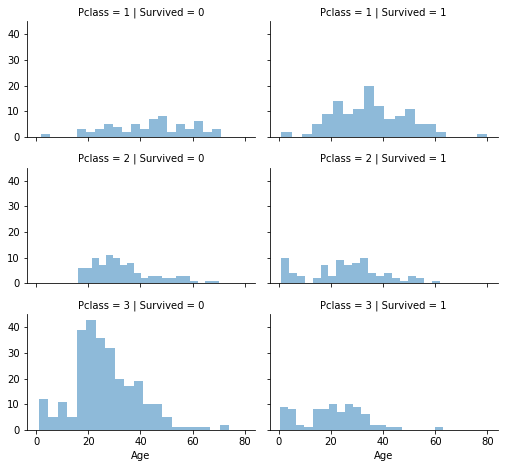

In [14]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

- Pclass 1 에 탑승한 대부분의 승객들은 생존률이 높습니다.
- Pclass 3에 탑승한 많은 승객들이 살아남지 못했습니다.
- Pclass 2와 3에 탑승한 유아 승객들은 거의 살아남았습니다.

#### 모델링에 Pclass는 영향있는 변수입니다.

### PointPlot을 이용한 범주형 데이터 확인
- x축과 y축의 변수들이 연관성있고, 순서상으로 필요한경우 pointplot이 효율적이다.

C:\Users\82105\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\82105\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\82105\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


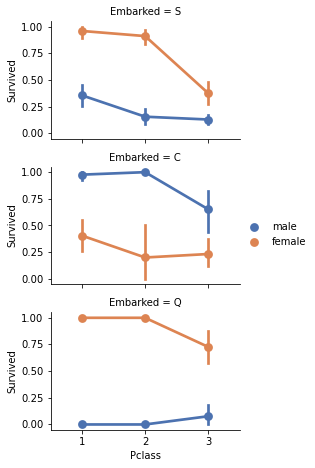

In [15]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

- 여성은 C항구를 제외하고 남성에 비해 생존률이 높습니다.
- Emvarked는 직접적으로 생존에 영향을 주지 않는듯 합니다.

### Sex변수는 모델훈련에 필요한 변수입니다.
#### Embarked 변수는 다른 변수들과의 관계를 추가로 확인할 필요가 있습니다.

### Embarked변수와 Sex변수와 Fare변수 그리고 Survived를 비교합니다.

C:\Users\82105\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\82105\anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


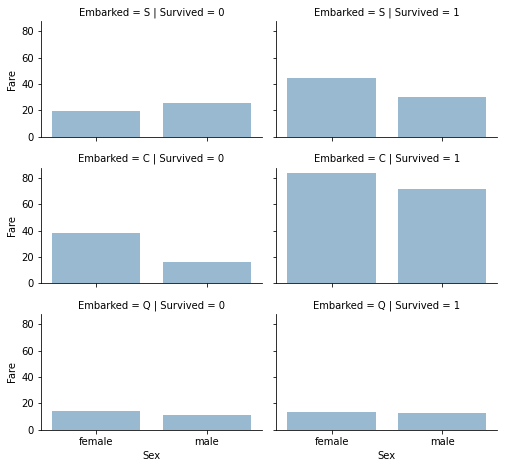

In [16]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

- 높은 Fare를 지급한 승객은 생존률이 높습니다.
    - Fare변수가 모델링에 필요할 수 있는 가능성이 있습니다.
- Embarked변수는 결국 생존률에 영향을 주는 변수입니다.


## 전처리과정 
- 필요한 데이터를 제외한 나머지 변수들을 지워야 합니다.(테스트, 훈련셋 둘다)
    -Cabin변수와 Ticket변수를 drop 시킵니다.

In [17]:
print("Before", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

"After", train_df.shape, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12) (418, 11) (891, 12) (418, 11)


('After', (891, 10), (418, 9), (891, 10), (418, 9))

#### 정규화를 통해서 새로운 TiTle변수 생성

In [18]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


- 정규화한 목록들중 확실하지 않은 데이터는 'Rare'에 묶고, 연관데이터끼리 합친 후 같은 것을 지칭하는 데이터들 합치기.
- 각 정규화된 목록들에 대한 생존률의 평균 구하기

In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


- 범주형 데이터들을 서수형 데이터로 전환시켜주기
    - Mr : 1
    - Miss : 2
    - Mrs : 3
    - Master : 4
    - Rare : 5

In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


#### Title이라는 변수를 생성했으니, Name 변수를 트레인셋과 테스트셋에서 제외시킬 수 있습니다.
- PassengerId 변수는 필요없으니 같이 삭제

In [21]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

### 문자열 데이터들 서수화 시켜주기
- female : 1 
- male : 0

In [22]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


### Age변수에 결측치를 숫자로 채워주는 과정
- 3가지의 방법이 있다.
    1. 제일 간단한 방법인데, 표준편차와 평균값을 난수로 채워주는 방법
    2. Pclass변수와 Sex변수를 관련지어 추측하는 방법
    3. 1번과 2번을 합치는 방법
- 1번과 3번은 랜덤노이즈를 이용해서 결과값이 일정하지 않으므로 2번 방법을 이용한다.

C:\Users\82105\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


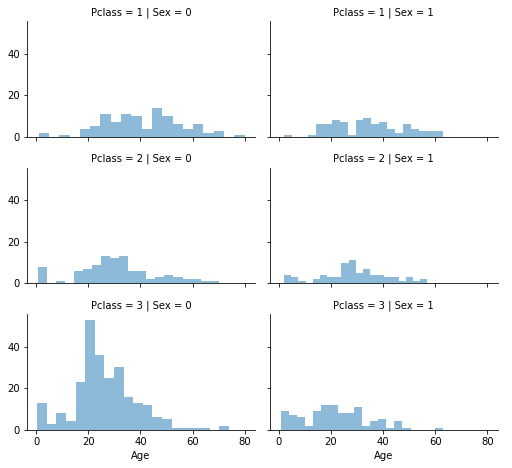

In [23]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Gender')
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

- Pclass(1,2,3)과 Sex(0,1)로 만들 수 있는 6가지의 분포를 확인할 수 있었고, 
6가지 조합을 통해 Age를 추측한다.

In [24]:
guess_ages = np.zeros((2,3))
guess_ages

array([[0., 0., 0.],
       [0., 0., 0.]])

In [25]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


#### Age의 범주를 나누고 생존과의 관계 확인하기 

In [26]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


#### 위와 같이 나눈 범주를 기반으로 서수형 데이터로 변환하고 새로 생성된 AgeBand 변수를 삭제하기
    - 16이하 : 0
    - 16초과 32이하 : 1
    - 32초과 48이하 : 2
    - 48초과 64이하 : 3

In [27]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [28]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


### Parch 변수와 Sibsp변수를 합쳐서 새로운 변수 생성
- SibSp(동반한 형제자매, 배우자 수)Patch(동반한 부모, 자식 수)를 합쳐 FamilySize라는 새로운 변수를 생성한다.

In [29]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


- FamilySize의 데이터를 보면 동반한 인원 수가 많다고 생존률이 높다고 할 수 없다는 것을 알 수 있다.
- 새로 생성된 FamilySize변수를 이용해서 혼자온 승객과 아닌 승객으로 나눌 수 있다.

In [30]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


- IsAlone데이터를 생성했으므로 이에 사용된 Parch, SibSp, FamilySize 변수들을 삭제한다.

In [31]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


#### Pclass와 Age변소를 결합하여 새로운 변수를 생성합니다.

In [32]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


- 트레인셋의 Embarked 변수에는 3개의 결측치를 가지고 있으므로 단순히 가장 공통적인 데이터로 채운다.
- 그 후 생존률과 비교한다

In [33]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [34]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


- Embarked 데이터를 수치형 데이터로 변환합니다.
    - S : 0
    - C : 1
    - Q : 2

In [35]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


- 테스트셋에 Fare변수의 결측치는 1개가 있는데, 이는 중간값으로 대체합니다.
- 이후 Fare변수 역시 서수형 데이터로 변환합니다.

In [36]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [37]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


- 위에서 만든 FareBand의 범위를 이용해서 서수를 적용합니다.
    - 7.91 이하 : 0
    - 7.91초과 14.454 이하 : 1
    - 14.454 초과 31 이하 : 2
    - 21 초과 512.329 이하 : 3

In [38]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [39]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


## 모델링, 예측 및 해결

- 지도학습(supervised learning)이라는 것과 분류회귀(Classification and Regression)임을 참고하여 예측 모델링을 선정해야 합니다.
    - Logistic Regression
    - KNN or k-Nearest Neighbors
    - Support Vector Machines
    - Naive Bayes classifier
    - Decision Tree
    - Random Forrest
    - Perceptron
    - Artificial neural network
    - RVM or Relevance Vector Machine

In [40]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

### 1. 로지스틱 회귀(Logistic Regression)
- 로지스틱 회귀는 누적 로지스틱 분포 인 로지스틱 함수를 사용하여 확률을 추정하여 범주 형 종속 변수와 하나 이상의 독립 변수 간의 관계를 측정합니다.

In [41]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

In [42]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201619
5,Title,0.397888
2,Age,0.287011
4,Embarked,0.261473
6,IsAlone,0.126553
3,Fare,-0.086655
7,Age*Class,-0.311069
0,Pclass,-0.750700


- 성별은 가장 높은 양성 계수이며, 여성(1)일 때 생존 확률이 가장 높음을 의미합니다.
- Pclass가 증가하면 생존 확률이 가장 많이 감소합니다.
- Age * Class는 Survived와 두 번째로 높은 음의 상관 관계를 갖기 때문에 모델링하기에 좋은 변수입니다.
- 두 번째로 높은 양의 상관 관계인 Title도 마찬가지입니다.

### 2. SVC(Support Vector Machines)
- 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적 이진 선형 분류 모델을 만든다. 
- 고차원에서 벡터들의 내적을 통해 데이터들의 선형 혹은 비선형 구분이 안되더라도 가능하도록 설계되었다.

In [43]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.23

### 3. KNN(k-Nearest Neighbors)
- KNN은 각 데이터간의 거리를 기준으로 나누는 알고리즘이다.
- 거리가 가까울 수록 같은 성질을 가지며, k개의 군집을 설정하여 분류할 수 있다.

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.74

### 4. 가우시안 나이브베이즈 (Gaussian Naive Bayes)

In [45]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

72.28

### 5. 퍼셉트론(Perceptron)
- 퍼셉트론은 지도학습을 위한 이진분류기이며, 선형분류기이다.
- 가중치를 벡터와 결합하는 선형 예측 함수를 기반으로 예측하는 분류 알고리즘이다.

In [46]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

78.34

### 6. Linear SVC(Linear Support Vector Classifier)

In [48]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

C:\Users\82105\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


78.79

### 7.경사하강법(Stochastic Gradient Descent)

In [49]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

70.59

### 8. 의사 결정 트리(Decision Tree)
- 나무구조로 나타내어 데이터들을 소집단으로 분류하여 예측을 하는 분석방법

In [51]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.76

### 9. 랜덤 포레스트(Random Forest)
- 과대적합의 단점을 가지는 Decision Tree를 극복하기위한 모델
- 독집적으로 다수의 모델을 생성하고 결합

In [59]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.76

### 각 모델들을 높은 점수 순서로 나타내기

In [55]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)


,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.74
2,Logistic Regression,80.36
7,Linear SVC,78.79
5,Perceptron,78.34
0,Support Vector Machines,78.23
4,Naive Bayes,72.28
6,Stochastic Gradient Decent,70.59


## 결과
- Random Forest와 Decision Tree의 점수가 가장 높지만 랜덤포레스트는 과대적합의 단점을 가지는 Decision Tree를 극복하기위한 모델이므로 Random Forest가 가장 높은 점수이다. 

In [60]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })

In [61]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
